In [1]:
import pandas as pd
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
test_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [6]:
#將時間分成月份、小時、天三個特徵
train_data.datetime = train_data.datetime.apply(pd.to_datetime)
train_data['month'] = train_data.datetime.apply(lambda x: x.month)
train_data['hour'] = train_data.datetime.apply(lambda x: x.hour)
train_data['day'] = train_data.datetime.apply(lambda x: x.day)
train_data.drop(['datetime'], 1, inplace = True)

In [7]:
test_data.datetime = test_data.datetime.apply(pd.to_datetime)
test_data['month'] = test_data.datetime.apply(lambda x: x.month)
test_data['hour'] = test_data.datetime.apply(lambda x: x.hour)
test_data['day'] = test_data.datetime.apply(lambda x: x.day)
test_data.drop(['datetime'], 1, inplace = True)

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      6493 non-null   int64  
 1   holiday     6493 non-null   int64  
 2   workingday  6493 non-null   int64  
 3   weather     6493 non-null   int64  
 4   temp        6493 non-null   float64
 5   atemp       6493 non-null   float64
 6   humidity    6493 non-null   int64  
 7   windspeed   6493 non-null   float64
 8   month       6493 non-null   int64  
 9   hour        6493 non-null   int64  
 10  day         6493 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 558.1 KB


In [9]:
data_notime = train_data.drop(['casual'],axis = 1) #casual跟registered是跟count相關 必須拿掉
data_notime = data_notime.drop(['registered'],axis = 1)
y = data_notime['count']
data_notime.drop(['count'],axis=1,inplace=True)

In [10]:
data_notime

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,hour,day
0,1,0,0,1,9.84,14.395,81,0.0000,1,0,1
1,1,0,0,1,9.02,13.635,80,0.0000,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,1,2,1
3,1,0,0,1,9.84,14.395,75,0.0000,1,3,1
4,1,0,0,1,9.84,14.395,75,0.0000,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,12,20,19
10883,4,0,1,1,13.94,15.910,61,15.0013,12,21,19
10884,4,0,1,1,13.94,17.425,61,6.0032,12,22,19


In [37]:
data_notime.drop(['atemp','holiday'],axis=1,inplace=True)

In [11]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
train_X, val_X, train_y, val_y = train_test_split(data_notime, y, random_state = 0)

In [40]:
train_X

,season,workingday,weather,temp,humidity,windspeed,month,hour,day
10639,4,0,3,14.76,93,8.9981,12,17,9
2666,2,0,1,28.70,65,0.0000,6,0,19
7474,2,1,1,22.14,37,23.9994,5,19,10
5094,4,1,2,18.86,94,12.9980,12,8,6
1714,2,0,1,15.58,46,26.0027,4,8,17
...,...,...,...,...,...,...,...,...,...
4859,4,1,3,22.14,60,15.0013,11,13,15
3264,3,1,1,28.70,65,15.0013,8,22,5
9845,4,0,1,27.06,39,27.9993,10,14,14
10799,4,0,2,14.76,87,8.9981,12,9,16


In [15]:
train_y

10639    229
2666      89
7474     553
5094     414
1714      43
        ... 
4859     153
3264     188
9845     617
10799    132
2732     383
Name: count, Length: 8164, dtype: int64

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [17]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

44.3005473916238


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
def random_forest(estimators):
    my_pipeline = Pipeline(steps=[
                                  ('model', RandomForestRegressor(n_estimators=estimators,
                                                                  random_state=0))
                                 ])
    scores = -1 * cross_val_score(my_pipeline,data_notime, y,
                                  cv=5,
                                  scoring='neg_mean_absolute_error')
    print("number of estimators:",estimators)
    #print("MAE scores:\n", scores)
    print("Average MAE score (across experiments):")
    print(scores.mean())
    print("----------------------------------------")
    return scores.mean()

In [19]:
#針對estimators數量去做參數測試
print("針對estimators數量去做參數測試:")
min_mae = random_forest(25)
for i in range (50,200,25):
    mae = random_forest(i)
    if mae<min_mae:
        min_mae = mae
        estimator = i
print("最佳結果")
print("minimum mae",min_mae)
print("estimators",estimator)

針對estimators數量去做參數測試:
number of estimators: 25
Average MAE score (across experiments):
85.98358564894782
----------------------------------------
number of estimators: 50
Average MAE score (across experiments):
85.85766309691478
----------------------------------------
number of estimators: 75
Average MAE score (across experiments):
85.76770498093502
----------------------------------------
number of estimators: 100
Average MAE score (across experiments):
85.75935439837049
----------------------------------------
number of estimators: 125
Average MAE score (across experiments):
85.71787798728926
----------------------------------------
number of estimators: 150
Average MAE score (across experiments):
85.75972346788834
----------------------------------------
number of estimators: 175
Average MAE score (across experiments):
85.78470793468814
----------------------------------------
最佳結果
minimum mae 85.71787798728926
estimators 125


# Xgboost

In [46]:
from xgboost import XGBRegressor
def xgboost_estimate(estimators):
    my_model = XGBRegressor(n_estimators=estimators, learning_rate=0.07, n_jobs=4)
    my_model.fit(train_X, train_y, 
                 early_stopping_rounds=5, 
                 eval_set=[(val_X, val_y)], 
                 verbose=False)
    my_pipeline = Pipeline(steps=[
                                  ('model',my_model )# XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
                                 ])
    scores = -1 * cross_val_score(my_pipeline,data_notime, y,
                                  cv=5,
                                  scoring='neg_mean_absolute_error')
    print("number of estimators:",estimators)
    #print("MAE scores:\n", scores)
    print("Average MAE score (across experiments):")
    print(scores.mean())
    print("----------------------------------------")
    return (scores.mean())

In [48]:
print("XGBOOST針對estimators數量去做參數測試:")
xg_min_mae = xgboost_estimate(15)
xg_estimator = 25
for i in range (16,30,1):
    mae = xgboost_estimate(i)
    if mae<xg_min_mae:
        xg_min_mae = mae
        xg_estimator = i
print("最佳結果")
print("minimum mae",xg_min_mae)
print("estimators",xg_estimator)

XGBOOST針對estimators數量去做參數測試:
number of estimators: 15
Average MAE score (across experiments):
87.0360348829004
----------------------------------------
number of estimators: 16
Average MAE score (across experiments):
85.09241029445622
----------------------------------------
number of estimators: 17
Average MAE score (across experiments):
83.65870655441843
----------------------------------------
number of estimators: 18
Average MAE score (across experiments):
82.31255354329944
----------------------------------------
number of estimators: 19
Average MAE score (across experiments):
81.15492725347474
----------------------------------------
number of estimators: 20
Average MAE score (across experiments):
80.58678087977994
----------------------------------------
number of estimators: 21
Average MAE score (across experiments):
79.91843494582517
----------------------------------------
number of estimators: 22
Average MAE score (across experiments):
79.52094186490237
---------------------

# SVR

In [22]:
from sklearn.svm import SVR

In [34]:
my_pipeline = Pipeline(steps=[
                              ('model', SVR(C=1.0, epsilon=0.2))
                             ])
scores = -1 * cross_val_score(my_pipeline,data_notime, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')
print("rbf(非線性):")
print("MAE scores:\n", scores)
print("Average MAE score (across experiments):")
print(scores.mean())

rbf(非線性):
MAE scores:
 [ 77.69688097  96.87023284  77.39019595 148.26363985 154.47802043]
Average MAE score (across experiments):
110.93979400575147


In [35]:
my_pipeline = Pipeline(steps=[
                              ('model', SVR(C=1.0, epsilon=0.2,kernel='linear'))
                             ])
scores = -1 * cross_val_score(my_pipeline,data_notime, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')
print("linear(線性):")
print("MAE scores:\n", scores)
print("Average MAE score (across experiments):")
print(scores.mean())

linear(線性):
MAE scores:
 [ 83.12894204 102.17916872  88.59452809 142.6771236  148.87133687]
Average MAE score (across experiments):
113.09021986503706


# Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
my_pipeline = Pipeline(steps=[
                              ('model', LinearRegression())
                             ])
scores = -1 * cross_val_score(my_pipeline,data_notime, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Average MAE score (across experiments):")
print(scores.mean())

MAE scores:
 [ 95.00228896 128.27328078 100.06485268 137.70263941 139.89427849]
Average MAE score (across experiments):
120.18746806282957


# 深度學習模型

In [26]:
train_X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,hour,day
10639,4,0,0,3,14.76,17.425,93,8.9981,12,17,9
2666,2,0,0,1,28.70,32.575,65,0.0000,6,0,19
7474,2,0,1,1,22.14,25.760,37,23.9994,5,19,10
5094,4,0,1,2,18.86,22.725,94,12.9980,12,8,6
1714,2,0,0,1,15.58,19.695,46,26.0027,4,8,17
...,...,...,...,...,...,...,...,...,...,...,...
4859,4,0,1,3,22.14,25.760,60,15.0013,11,13,15
3264,3,0,1,1,28.70,32.575,65,15.0013,8,22,5
9845,4,0,0,1,27.06,31.060,39,27.9993,10,14,14
10799,4,0,0,2,14.76,17.425,87,8.9981,12,9,16


In [27]:
array_X = data_notime.values #轉換成np array

In [28]:
array_X

array([[ 1.,  0.,  0., ...,  1.,  0.,  1.],
       [ 1.,  0.,  0., ...,  1.,  1.,  1.],
       [ 1.,  0.,  0., ...,  1.,  2.,  1.],
       ...,
       [ 4.,  0.,  1., ..., 12., 21., 19.],
       [ 4.,  0.,  1., ..., 12., 22., 19.],
       [ 4.,  0.,  1., ..., 12., 23., 19.]])

In [29]:
array_y = y.values #轉換成np array

In [30]:
array_y

array([ 16,  40,  32, ..., 168, 129,  88], dtype=int64)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(array_X, array_y, test_size = 0.08, random_state = 0)

Epoch 1/100
1002/1002 [==============================] - 1s 727us/step - loss: 28237.6875
Epoch 2/100
1002/1002 [==============================] - 1s 751us/step - loss: 21590.4805 0s - loss: 21481
Epoch 3/100
1002/1002 [==============================] - 1s 753us/step - loss: 21307.8945
Epoch 4/100
1002/1002 [==============================] - 1s 763us/step - loss: 21146.9668 0s - loss: 
Epoch 5/100
1002/1002 [==============================] - 1s 735us/step - loss: 20878.5098
Epoch 6/100
1002/1002 [==============================] - 1s 728us/step - loss: 20455.8848
Epoch 7/100
1002/1002 [==============================] - 1s 729us/step - loss: 19845.7148
Epoch 8/100
1002/1002 [==============================] - 1s 743us/step - loss: 19043.1875
Epoch 9/100
1002/1002 [==============================] - 1s 745us/step - loss: 18011.7656
Epoch 10/100
1002/1002 [==============================] - 1s 732us/step - loss: 16930.3887
Epoch 11/100
1002/1002 [==============================] - 1s 706us/ste

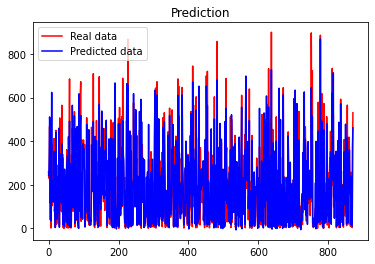

In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 11))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 1))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
train_history = model.fit(X_train, y_train, batch_size = 10, epochs = 100)

y_pred = model.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

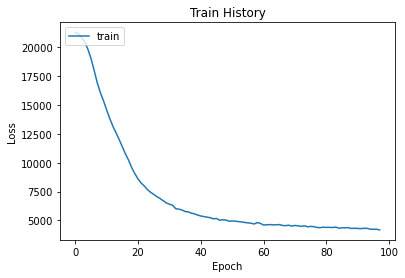

In [33]:
def show_train_history(train):
    plt.figure()
    plt.plot(train_history.history[train][2:])
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train"], loc="upper left")
    plt.show()

show_train_history('loss')